PART-1

In [1]:
import sys
import pandas as pd
import numpy as np
import operator
import math
from matplotlib import pyplot as plt

In [ ]:
#Taking input of test file path
testfile1 = sys.argv[1]
testfile2 = sys.argv[2]

In [4]:
#Adding column names to dataset
col_names = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'Id']
dataset1 = pd.read_fwf('C:/Users/sarat/Desktop/assignment 2/RobotDataset/Robot1',sep = " ",header = None,names = col_names)
dataset2 = pd.read_fwf('C:/Users/sarat/Desktop/assignment 2/RobotDataset/Robot2',sep = " ",header = None,names = col_names)
dataset1 = dataset1.drop('Id',1)
dataset2 = dataset2.drop('Id',1)

In [5]:
X1 = dataset1
y1 = dataset1['class']
X2 = dataset2
y2 = dataset2['class']

In [6]:
# Split data into training and testing sets.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=42)
X1_test = X1_test.drop('class',1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state=42)
X2_test = X2_test.drop('class',1)

In [7]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(a, b)]))

In [8]:
#Utility function to give maximum occurance of value among k values
def max_occur(k_near):
    ans = {}
    for i in list(k_near.keys()):
        if(k_near[i] not in ans):
            ans[k_near[i]] = 1
        else:
            ans[k_near[i]]+=1
    return max(ans.items(), key=operator.itemgetter(1))[0]

In [9]:
#K-NN algorithm
def knn(X_test,X_train,k):
    predict_Y = []
    for i in range(len(X_test)):
        k_near = {}
        for j in range(len(X_train)):
            k_dist = dist(list(X_test.iloc[i,:]),list(X_train.iloc[j,1:8]))
            if(len(k_near)<k):
                k_near[k_dist] = X_train.iloc[j,0]
                max_k_near = max(k_near.keys())
            else:
                if(k_dist<max_k_near):
                    del k_near[max_k_near]
                    k_near[k_dist] = X_train.iloc[j,0]
                    max_k_near = max(k_near.keys())
        predict_Y.append(max_occur(k_near))
    return predict_Y 

In [10]:
#predicted values of testing data
y1_predict = knn(X1_test,X1_train,3)
y2_predict = knn(X2_test,X2_train,3)

In [11]:
#Compare function to compare predicted and test values of testing dataset

def compare(Y_test,Y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(Y_test)):
        if(Y_test[i]==Y_pred[i]):
            if(Y_test[i] == 1):
                tp+=1
            else:
                tn+=1
        else:
            if(Y_pred[i]==1):
                fp+=1
            else:
                fn+=1
    precision = tp/float(tp+fp)
    recall = tp/float(tp+fn)
    accuracy = (tp+tn)/float(tp+tn+fp+fn)
    error_rate = (fp+fn)/float(tp+tn+fp+fn)
    print("Precision : ",precision)
    print("Recall : ",recall)
    print("Accuracy : ",accuracy)
    print("Error rate : ",error_rate)
    return

In [12]:
print("-------------Validation---------------------")
print("------------For robot-1 dataset-------------")
compare(list(y1_test),y1_predict)
print("------------For robot-2 dataset--------------")
compare(list(y2_test),y2_predict)

-------------Validation---------------------
------------For robot-1 dataset-------------
Precision :  0.6153846153846154
Recall :  0.8
Accuracy :  0.72
Error rate :  0.28
------------For robot-2 dataset--------------
Precision :  0.9090909090909091
Recall :  0.8333333333333334
Accuracy :  0.88
Error rate :  0.12


TESTING DATA

In [ ]:
td1 = pd.read_fwf(testfile1,sep = " ",header = None,names = col_names)
tX1 = td1.drop('Id',1)
tX1 = tX1.drop('class',1)
ty1 = td1['class']
ty1_predict = knn(tX1,X1_train,3)
print("-------For robot-1 test data -------")
compare(ty1_predict,list(ty1))

td2 = pd.read_fwf(testfile2,sep = " ",header = None,names = col_names)
tX2 = td2.drop('Id',1)
tX2 = tX2.drop('class',1)
ty2 = td2['class']
ty2_predict = knn(tX2,X2_train,3)
print("-------For test-2 data -------")
compare(ty2_predict,list(ty2))

PART-2

In [13]:
## Import the Classifier.
from sklearn.neighbors import KNeighborsClassifier
X1_train = X1_train.drop('class',1)
X2_train = X2_train.drop('class',1)
## Instantiate the model with 5 neighbors. 
Knn = KNeighborsClassifier(n_neighbors=3)
## Fit the model on the training data.
Knn.fit(X1_train, y1_train)
## See how the model performs on the test data.
print("For robot-1, accuracy = ",Knn.score(X1_test, y1_test))
Knn.fit(X2_train, y2_train)
print("For robot-2, accuracy = ",Knn.score(X2_test, y2_test))


For robot-1, accuracy =  0.76
For robot-2, accuracy =  0.88


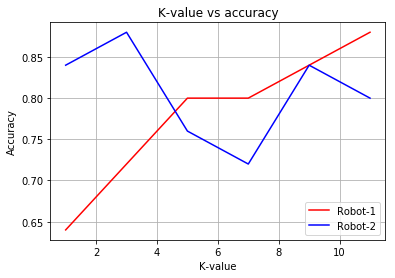

In [14]:
#plotting graph with k value as X-axis and accuracy as y-axis
x = [1,3,5,7,9,11]
y1 = [0.64,0.72,0.8,0.8,0.84,0.88]
y2 = [0.84,0.88,0.76,0.72,0.84,0.8]
plt.plot(x,y1,'r')
plt.plot(x,y2,'b')
plt.legend(('Robot-1','Robot-2'))
plt.title("K-value vs accuracy")
plt.ylabel('Accuracy')
plt.xlabel('K-value')
plt.grid(True)